# Exploratory Data Analysis with Python
[Takato Matsumoto](takato.matsumoto0114@gmail.com) - Jun 2019




## 自転車レンタルデータの分析 
自転車のレンタル数にどのような要素が影響を与えるのかを分析することを目的としたものです．  
以下の分析を行います．
1. <b>レンタル数の分析</b>
2. <b>気温と湿度の分析</b>
3. <b>Feature Engineering (特徴量作成)</b>


In [15]:
#ライブラリの読み込み
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import os.path
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [16]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (15,10)

In [17]:
#CSVファイルの読み込み，dfという名前のデータフレームにCSVファイルを読み込んでいます
df = pd.read_table('./input/train.tsv')


In [18]:
#読み込んだデータのチェック
df.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
0,5,90,Private,313986,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
1,10,46,Private,74895,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1485,55,United-States,<=50K
2,11,37,Private,67433,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
3,13,45,Local-gov,144940,Masters,14,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K
4,14,40,Private,272960,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,42,United-States,>50K


id                0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Y                 0
dtype: int64

In [20]:
#データのカラムのチェック
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              16280 non-null  int64 
 1   age             16280 non-null  int64 
 2   workclass       16280 non-null  object
 3   fnlwgt          16280 non-null  int64 
 4   education       16280 non-null  object
 5   education-num   16280 non-null  int64 
 6   marital-status  16280 non-null  object
 7   occupation      16280 non-null  object
 8   relationship    16280 non-null  object
 9   race            16280 non-null  object
 10  sex             16280 non-null  object
 11  capital-gain    16280 non-null  int64 
 12  capital-loss    16280 non-null  int64 
 13  hours-per-week  16280 non-null  int64 
 14  native-country  16280 non-null  object
 15  Y               16280 non-null  object
dtypes: int64(7), object(9)
memory usage: 2.0+ MB


10886件の物件データがあることがわかります.  
また，カラムの数は10カラムで，int,floatの数値型であることも分かります．

# 1. 目的変数の分析


Text(0, 0.5, 'Count')

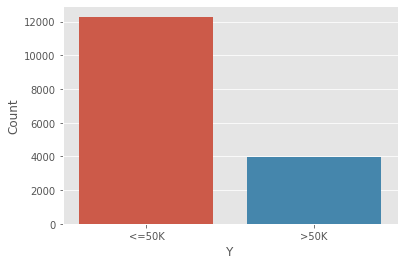

In [14]:
#目的変数の分布
sns.countplot(df['Y'])
plt.ylabel('Count')

12000人が年間収入＄50K以下、4000人が年間収入＄50K以上であることが分かります

# 2. 気温と湿度の分析


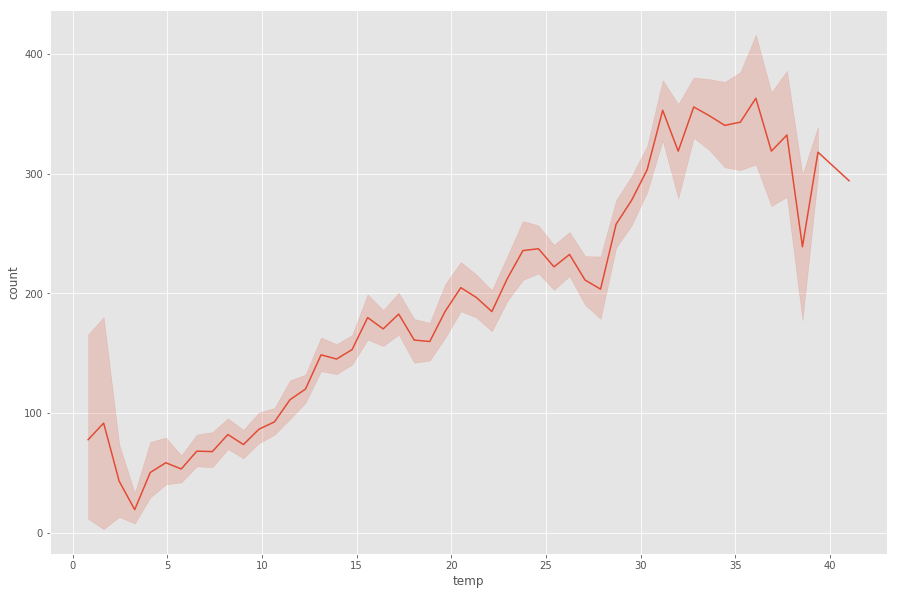

In [0]:
var = 'temp'
sns.lineplot(x=var,y='count',data=df)

気温とレンタル数の関係を描画したグラフです．気温が高くなるにつれレンタル数が増えることがわかります．しかし，30度付近で頭打ちになり，レンタル数が増えなくなるようです．暑いときはあまり外に出たくなくなりますよね  

## 演習1．湿度とレンタル数の関係分析
次に湿度について見てみましょう  
var に湿度を意味するデータを入力してください

In [0]:
var = 
sns.lineplot(x=var,y='count',data=df)

SyntaxError: invalid syntax (<ipython-input-60-a3c7ce5ba387>, line 1)

グラフからどんなことが分かりますか？考察してみましょう．

ここに入力してください

## 演習2．自由分析
どんな条件がレンタル数に影響を与えそうか仮説を立て，分析を行なってください.  

立てた仮説をここに入力してください

結果から得られた考察をここに入力してください

# 3. Feature Engineering (特徴量作成)


'datetime'カラムから，新しく特徴量を作成することができます．'datetime'カラムには年月日と時間の情報が格納されています．

In [0]:
df["year"] = df["datetime"].dt.year
df['weekday'] = df['datetime'].dt.weekday_name
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,Saturday


"year"と"weekday"のカラムが追加されていることが分かります．これによって年と曜日について分析ができるようになりました．

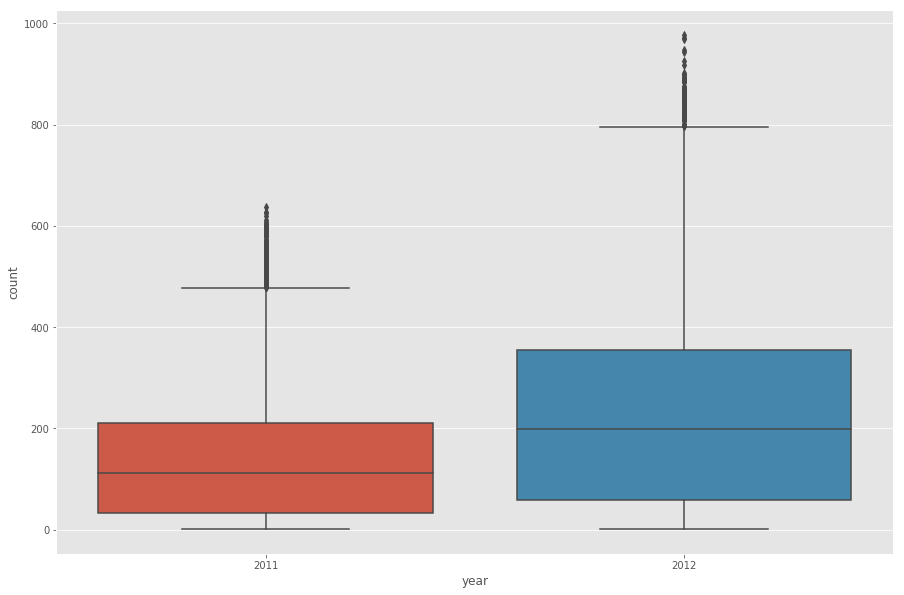

In [0]:
var = 'year'
sns.boxplot(x=var,y='count',data=df)

2011年と比べ，2012年の方が平均レンタル数が多いことが分かります．

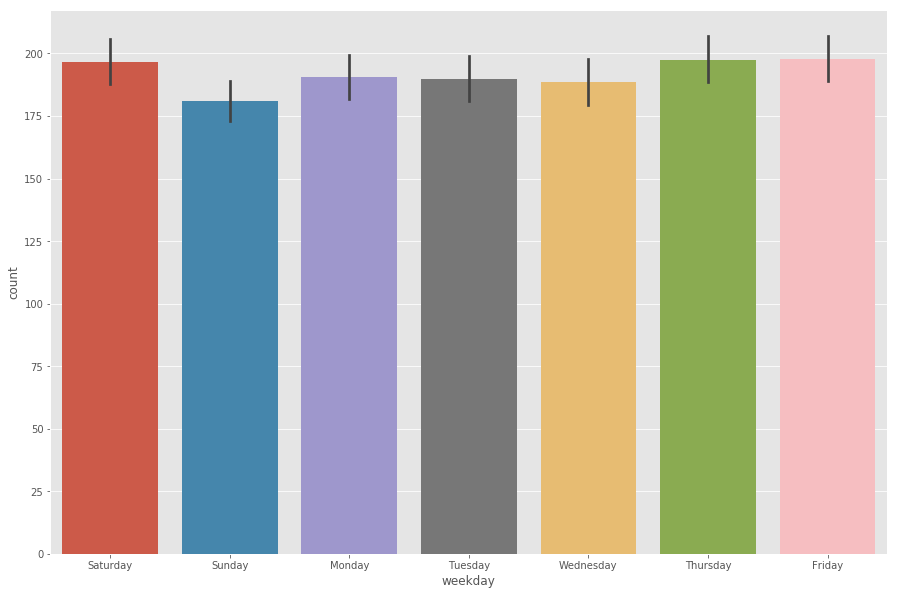

In [0]:
var = 'weekday'
sns.barplot(x=var,y='count',data=df)

曜日によってレンタル数はあまり変わらないことが分かります．

## 演習3. 特徴量の作成
以下の記事を参考に，月と日にち，時間の特徴量を作成してください
https://qiita.com/Takemura-T/items/79b16313e45576bb6492

In [0]:
df["month"] = 
df["day"] = 
df["hour"] = 
df.head()

SyntaxError: invalid syntax (<ipython-input-64-d27e2e10b4b9>, line 1)

## 演習4. 作成した特徴量の分析
月と日にち，時間がそれぞれ，自転車のレンタル数とどんな関係があるか分析してください．また，結果から考察してください．

## 演習5. Workingday/hour の分析
以下のグラフからどんなことが言えるでしょうか

考察をここに入力してください

In [0]:
sns.pointplot(x='hour',y='count',data=df, hue='workingday')

ValueError: Could not interpret input 'hour'